# Final Project
____

## Part 1. Dataset description

- ### Description

The dataset used in this study consists of football player statistics from the 2021-2022 season. It includes performance metrics such as passes completed(PasTotCmp),Interceptions(Int), completed passes into the 18-yard box(PPA) and more. In addition, it also contains player's details such as minutes played(Min), squad, league(Comp) and more. The dataset covers players across the top five European leagues: Premier League, La Liga, Bundesliga, Serie A, and Ligue 1.

This project focuses on the performance of midfielders across these five leagues. To ensure precise analysis, only midfielders who played a total of **1500 minutes played and above** were extracted for further analysis. The features have also been streamlined to only about 30 features from 120 features to remove any redundancies of features.

**Notice:** All performance metrics(features) values that are not in percentage, are recorded in per 90s(Minutes played/90 minutes) unit.

As we go furthur down the analysis, the below features will be mostly used. Therefore, kindly refer to the meaning of each studied feature in the glossary below. 

- ### Glossary

    * **PPA:** Completed passes into the 18-yard box
    * **PresDef3rd:** Number of times applying pressure to opposing player who is receiving, carrying or releasing the ball, in the defensive 1/3
    * **Int:** Interceptions
    * **Clr:** Clearances
    * **TouAtt3rd:** Touches in attacking 1/3
    * **RecProg:** Completed passes that move the ball towards the opponent's goal at least 10 yards from its furthest point in the last six passes, or any completed pass into the penalty area
    * **Squad:** Name of football club the player is playing for
    * **Comp:** The name of the league the player is playing in
    * **Min:** The number of minutes played for the whole season
<br>


- ### Correlation 

Firstly, correlation analysis between Assists and features was conducted. Only features in the top 3 most postively and negatively correlated were choosen for further analysis in the report.
<br>


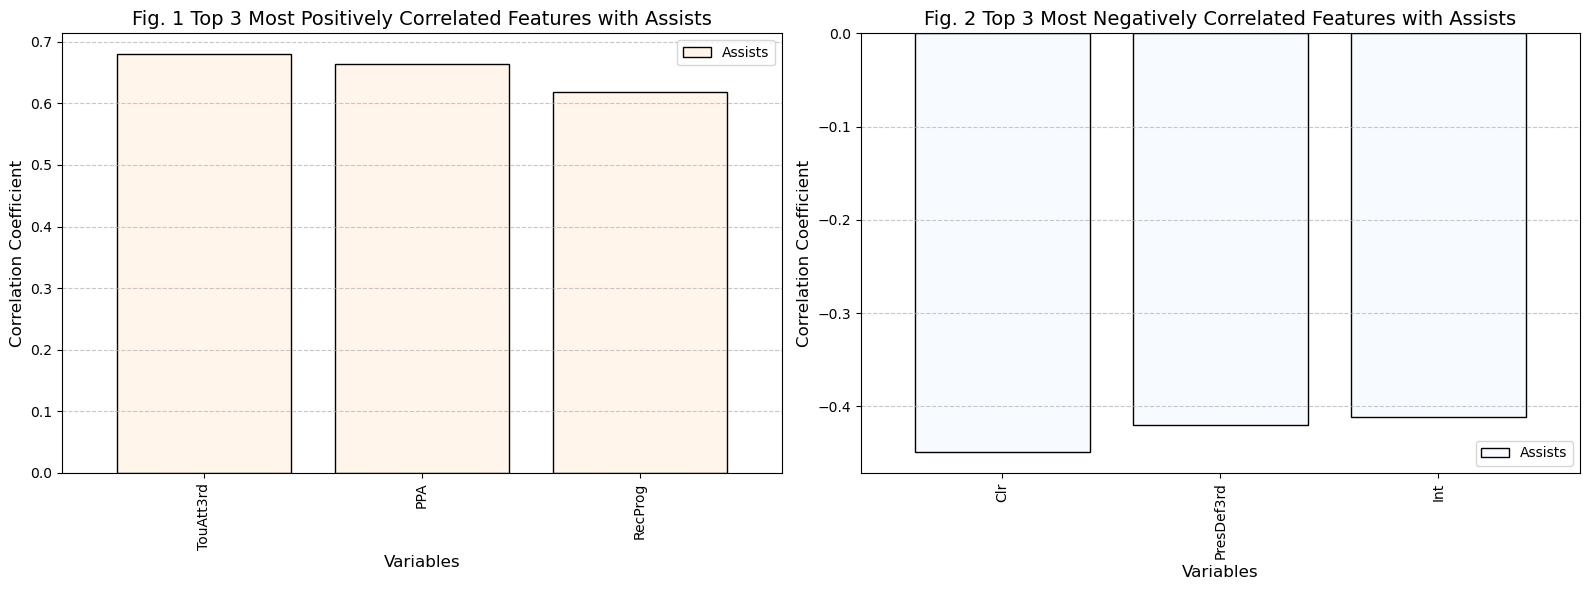

In [1]:
%run scripts/correlation.py

Results from Fig. 1 and Fig. 2 shows:

- The most positively correlated feature to target variable Assists is TouAtt3rd (Touches in the attacking 3rd) with a correlation of approximately 0.68 and the most negatively correlated to Assists is ball clearance(Clr) with a correlation of approximately -0.45.
- Other features also indicates strong correlation(r > ±0.5) such as PPA and RecProg but also weak correlation(r < ±0.5) such as PresDef3rd and Int.


<br>

- ### Dispersion

| Feature    |  Min  |  Max  | Range | 25th Percentile | 75th Percentile | Interquartile Range | Std Dev | Variance |
|------------|------:|------:|------:|----------------:|----------------:|---------------------:|--------:|---------:|
| Assists    |  0.00 |  0.63 |  0.63 |            0.04 |            0.16 |                 0.12 |    0.10 |     0.01 |
| TouAtt3rd  |  4.68 | 43.30 | 38.62 |           11.18 |           20.95 |                 9.78 |    6.77 |    45.80 |
| PPA        |  0.05 |  2.73 |  2.68 |            0.53 |            1.24 |                 0.71 |    0.52 |     0.27 |
| RecProg    |  0.16 | 10.80 | 10.64 |            1.37 |            4.12 |                 2.75 |    2.08 |     4.31 |
| Clr        |  0.10 |  4.07 |  3.97 |            0.66 |            1.49 |                 0.83 |    0.67 |     0.45 |
| PresDef3rd |  1.55 | 10.70 |  9.15 |            4.18 |            6.79 |                 2.61 |    1.88 |     3.53 |
| Int        |  0.32 |  3.77 |  3.45 |            1.12 |            1.94 |                 0.82 |    0.60 |     0.35 |
| 90s        | 16.70 | 37.30 | 20.60 |           20.40 |           28.40 |                 8.00 |    5.13 |    26.32 |


In [2]:
%run scripts/dispersion.py

The filtered dataset containing 344 cases(midfilders) shows:
- Midfielders in the bottom 25% have an Assists value of 0.04/90s which equates to approximately 0.8 Assists(0 Assists) for the whole season.
- Midfielders in top 25% have an Assists of 0.16/90s which equates to approximately 4.5 Assists(4 Assists) for the whole season.
- High range value of TouAtt3rd(38.62/90s) indicates significant variation among midfielders in their involvement in the attacking third of the field.
- Defensive actions (PresDef3rd, Int, Clr) have moderate dispersion. Defensive contributions are not highly concentrated among a few players. This suggests that defensive duties are shared relatively evenly across midfielders, with moderate variance.

<br>

### Part 2. Hypothesis testing

- ####  Simple Linear Regression

It was shown above that relationships exists between Assists and TouAtt3rd/PPA, so it is necessary to check whether these relationships are statistically significant and how a unit increase of these features influence Assists numbers.



Regression results for Fig. 3 TouAtt3rd vs Assists:
Slope: 0.011, Intercept: -5.9e-02, R-value: 0.680, P-value: 5.8e-48
Regression results for Fig. 4 PPA vs Assists:
Slope: 0.134, Intercept: -1.1e-02, R-value: 0.663, P-value: 5.8e-45


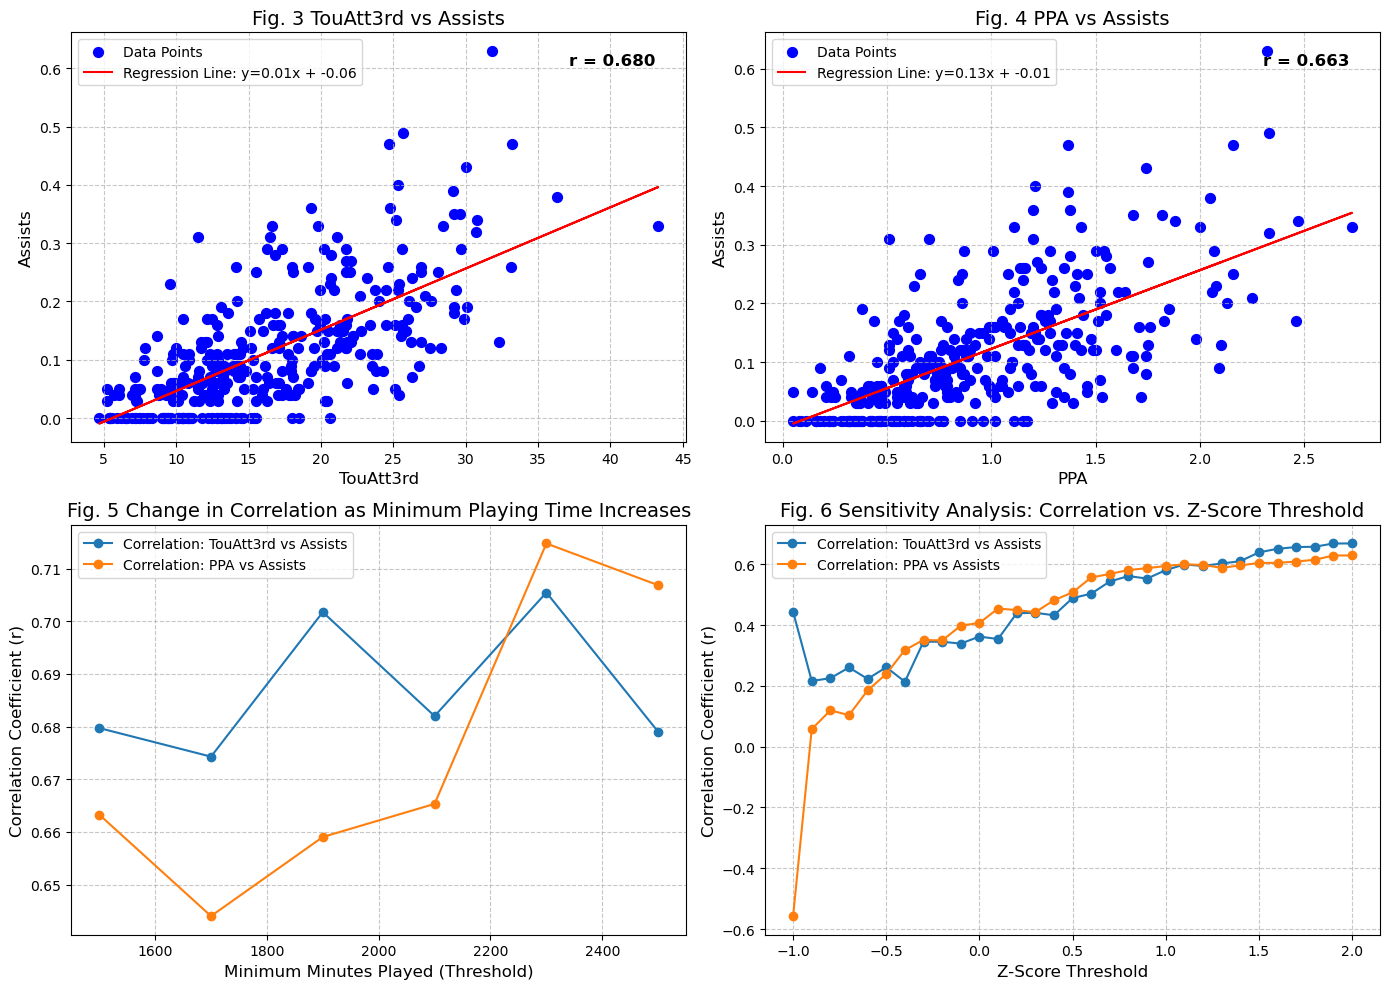

In [3]:
%run scripts/regression.py

Results shows:
- There is a statistically significant relationship for both TouAtt3rd and PPA with Assists (p < 0.005).
- For a one-unit increase in the TouAtt3rd, the Assists is expected to increase by approximately 0.01 units(Fig. 3). Meanwhile, a one-unit increase in the PPA will increase the Assists by approximately 0.13 units(Fig. 4).
- Correlation between TouAtt3rd and Assists fluctuates and peaks at a threshold of 2300 minutes(only midfielders who played more than 2300 minutes was included), meanwhile PPA increases steadily before peaking at 2300 minutes(Fig. 5). These probably suggest two things:
    - Elite, high-minute midfielders generate assists in different ways and not just through having more touches in the attacking 3rd.
    - Elite, high-minute midfielders rely more on passes into the 18-yard box(PPA) rather than being active in the attacking third to generate assists.
- The sensitivity to Z-Score Threshold indicates that extreme values have a noticeable impact on the correlation. However, positive correlation persists across different slices of the data, reinforcing the robustness of the observed relationship(Fig. 6).
<br>

- ####  Two-sample t test

T test was then conducted to study whether or not they are significant differences between the 25th and 75th percentile players in Assists with their attacking actions metrics(TouAtt3rd and PPA) and their defensive actions metrics(Clr and PresDef3rd).


T-test for TouAtt3rd: t-statistic = 15.07, p-value = 0.0000
T-test for PPA: t-statistic = 13.90, p-value = 0.0000
T-test for Clr: t-statistic = -9.15, p-value = 0.0000
T-test for PresDef3rd: t-statistic = -7.44, p-value = 0.0000


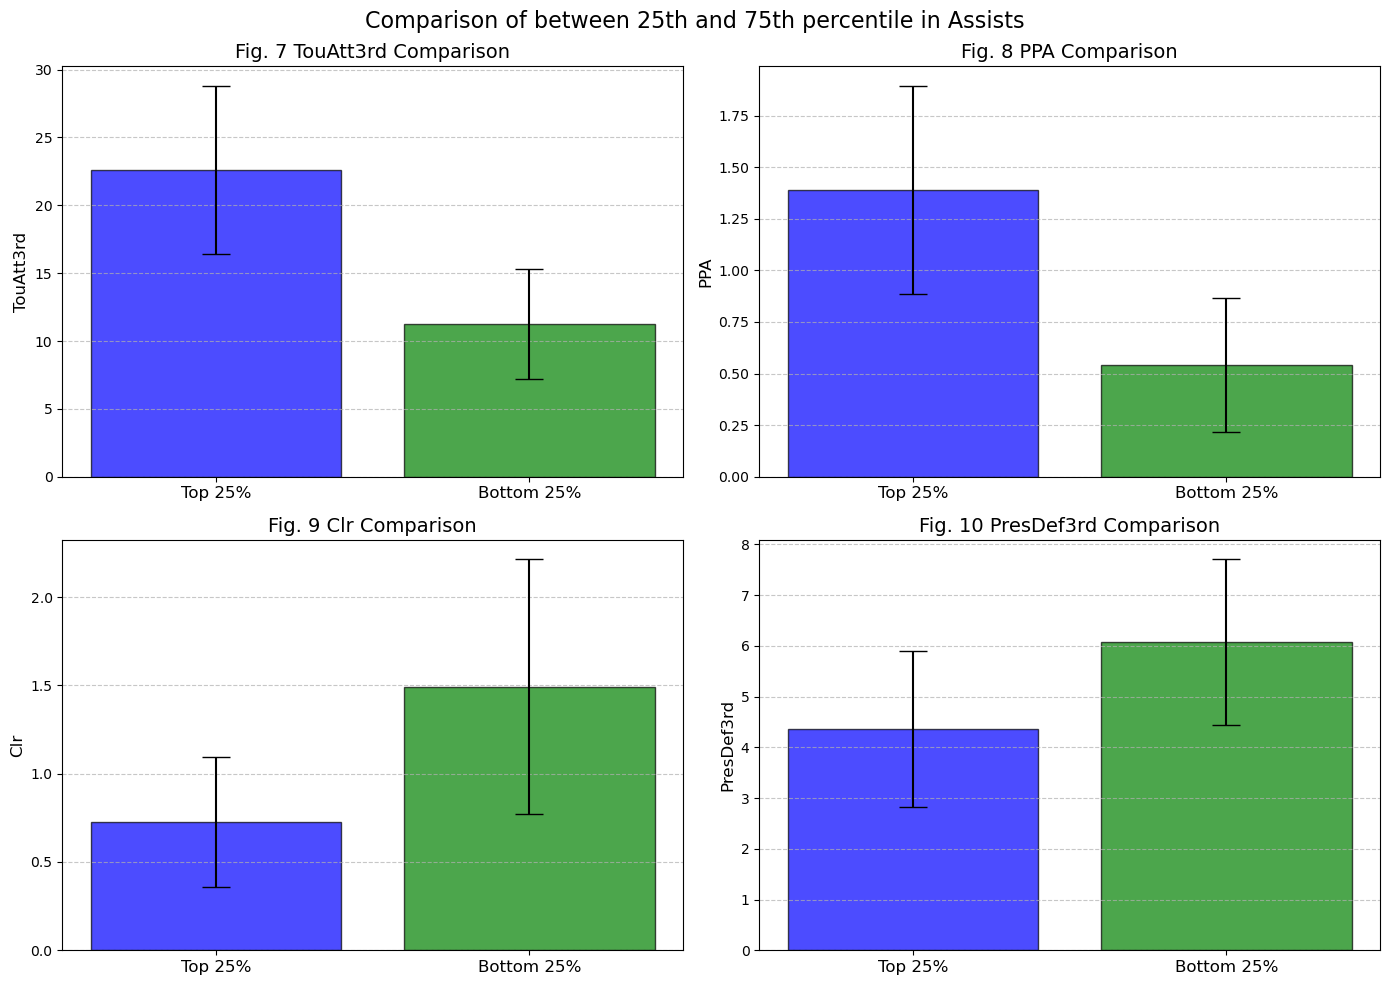

In [4]:
%run scripts/t_test.py

Results shows:
- There is significant difference between the 25th and 75th percentile players in Assists with all metrics(p < 0.005).These findings highlight a clear distinction between attacking and defensive midfield roles.
- From Fig. 7 and 8, 75th percentile players recorded higher values in TouAtt3rd (t = 15.07) and PPA (t = 13.9), confirming their active involvement in advanced attacking play and frequently operate in the final third of the field. These traits are commonly associated with attacking and central midfielders (AMF/CMF).
- Conversely, from Fig. 9 and 10, midfielders with lower assist numbers show significantly higher values in Clr (t = -9.15) and PresDef3rd (t = -7.44), suggesting a greater focus on defensive responsibilities. These players characteristics typically associated with defensive midfielders (DMF).

<br>

### Part 3. Machine learning




- #### Classification

Similar to the hypothesis testing results above, a classification analysis on the 25th and 75th percentile midfielders was conducted. However, before proceeding with classification analysis, preprocessing using RobustScaler for both TouAtt3rd and PPA were conducted to improve validity and remove outlier in both features. As seen in Fig. 11 and 12, both features values were able to be scaled on an identical x-axis range and distribution characteristics have been improved.

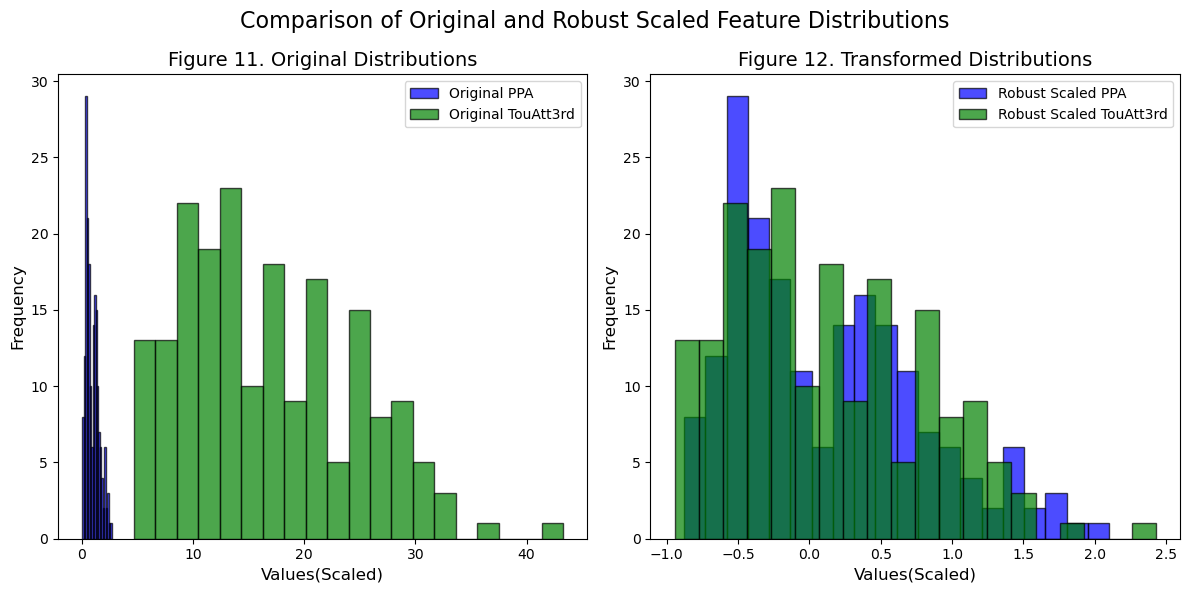

In [5]:
%run scripts/preprocessing.py

Machine Learning Results for Midfielders in the 25th and 75th Assists Percentile (With RobustScaler) :
   Average classification rate (CR) = 0.869



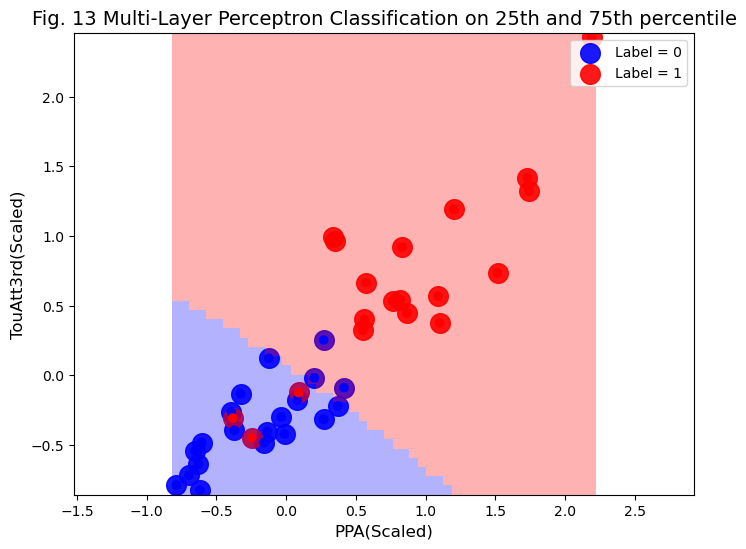

In [6]:
%run scripts/classification.py

Results from the preprocessing and Multi-Layer Perceptron (MLP) classifier were: 
- Successful in classifying these midfielders in both groups with a classification rate of 0.869 (Fig.13).
- Able to support the hypothesis testing interpretation above, that 75th percentile midfielders typically have high number of Touches in the Attacking 3rd(TouAtt3rd) and also higher number of completed passes into the 18 yard box(PPA).

#### 2. Clustering

#### K-Means Clustering
Secondly, using th same features and target variable, K-Means clustering was implemented to observe whether the midfielders can be clustered into the 3 typical main roles in midfield namely:
  
 - attacking midfielder (AMF) who is actively participating in attacking action but low contribution in defense.
 - central midfielder(CMF) who has balanced participatation in attacking and defensive action
 - defensive midfielder(DMF) who is actively pariticipating in defensive action but low contribution in attack. 

Silhouette Score: 0.572


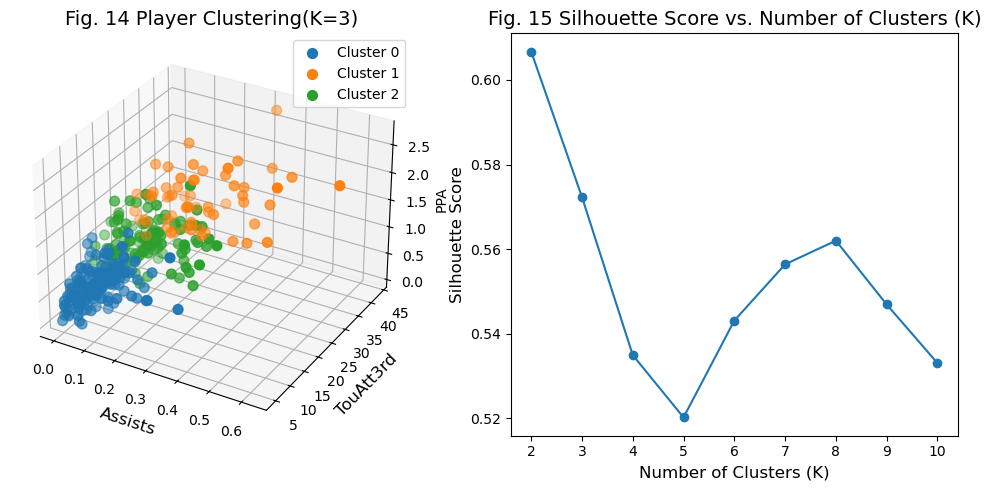

In [7]:
%run scripts/clustering.py

Results shows:

- The K-Means clustering(k = 3) successfully cluster these midfielders into moderately well-seperated clusters with a silhoutte score of 0.572 (Fig. 14).
- However, higher silhoutte score can be observed when the clustering is divided only into 2 clusters(Fig. 15). This could probably suggests two things:
    - First, there is a need for more robust model that includes more features to distinguish the role of the midfielders more precisely.
    - Or, most teams in season 2021/2022(current generation) preferred to play with only 2 types of midfielders roles instead of the typical 3 in the past.
- In addition, no improvement was observed in K-Means Clustering results after applying preprocessing techniques, prompting the decision to retain the original dataset for analysis.


#### Cluster Summary  
- Maintaning the three clusters,the mean values of every attacking-based metrics features(TouAtt3rd,PPA,RecProg) and defensive-based metrics features(Clr,PresDef3rd,Int) potentially indicate that player in cluster 0 could be a DMF(high value across defensive-based metrics), cluster 1 a AMF(high mean value across all attacking-based metrics) and cluster 2 a CMF(balanced mean value across all features).
-  Distribution of top 3 midfielders' with the most minutes in each team(Fig. 16) across the five leagues shows that teams mostly play with cluster 0 (DMF) with 145 midfielders and cluster 2(CMF) midfielders with 84 midfielders, which indicates that a more balanced-defensive playstyle is preferred.
-  There are teams where less than 3 midfielders can be extracted due to minutes played being less than 1500 minutes. No adjustment done to accommodate this and this report assumed that those midfielders were not asssigned to a proper/fixed role thus will not contribute precisely to the analysis.


| Cluster  | Number of Players | Assists | TouAtt3rd | PPA  | RecProg | Clr  | PresDef3rd | Int  |
|----------|------------------|---------|-----------|------|---------|------|------------|------|
| 0        | 145              | 0.058   | 10.956    | 0.578 | 1.557   | 1.539 | 6.342      | 1.868 |
| 1        | 49               | 0.243   | 27.476    | 1.679 | 5.460   | 0.571 | 3.832      | 1.103 |
| 2        | 84               | 0.133   | 18.739    | 1.088 | 3.694   | 0.872 | 5.011      | 1.314 |


In [ ]:
%run scripts/clustering_analysis.py